In [1]:
import numpy as np # linear algebra
import pandas as pd
import os
print(os.listdir("./dataset/rossmann"))

['state_names.csv', 'store.csv', 'googletrend.csv', 'test.csv', 'train.csv', 'weather.csv', 'store_states.csv', 'sample_submission.csv']


In [3]:
store = pd.read_csv("./dataset/rossmann/store.csv", low_memory=False)
train = pd.read_csv("./dataset/rossmann/train.csv",parse_dates=[2],  low_memory=False)
test = pd.read_csv("./dataset/rossmann/test.csv",parse_dates=[3], low_memory=False)

In [4]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
np.shape(store)

(1115, 10)

In [6]:
np.shape(train)

(1017209, 9)

In [7]:
np.shape(test)

(41088, 8)

In [8]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [9]:
store.PromoInterval.value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [10]:
store.fillna(0, inplace=True)

In [11]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [12]:
train.head().append(train.tail())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [13]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [14]:
train.Open.value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [15]:
np.sum([train['Sales'] == 0])

172871

Text(0.5, 1.0, 'Store 10 Sales Distribution')

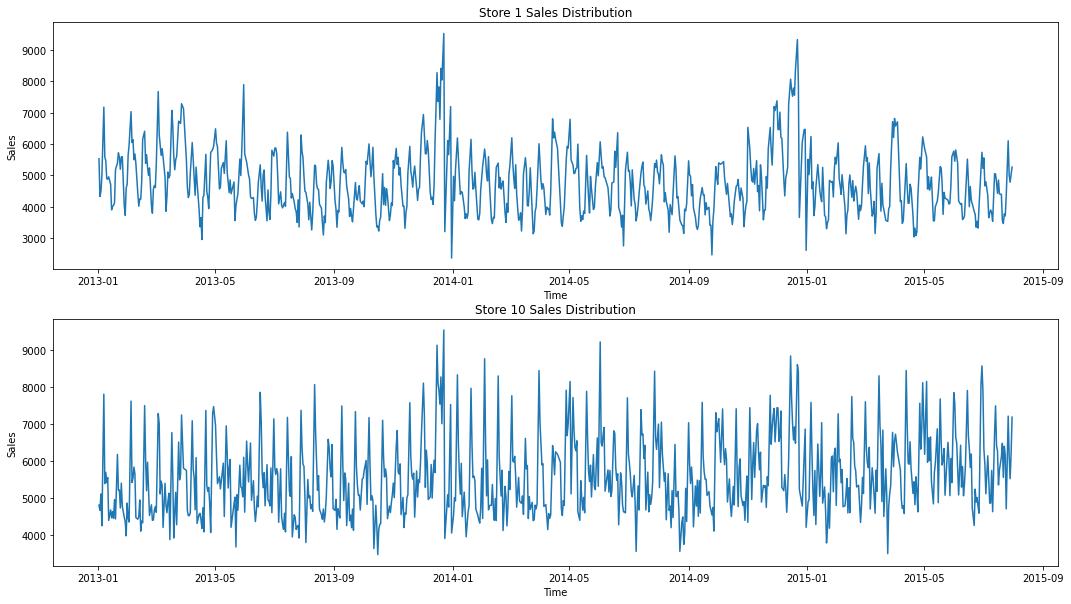

In [16]:
# draw store 1 and store 10 sales distribution plot
import matplotlib.pyplot as plt
store_1 = train.loc[(train["Store"]==1)&(train['Sales']>0), ['Date',"Sales"]]
store_10 = train.loc[(train["Store"]==10)&(train['Sales']>0), ['Date',"Sales"]]
f = plt.figure(figsize=(18,10))
ax1 = f.add_subplot(211)
ax1.plot(store_1['Date'], store_1['Sales'], '-')
ax1.set_xlabel('Time')
ax1.set_ylabel('Sales')
ax1.set_title('Store 1 Sales Distribution')

ax2 = f.add_subplot(212)
ax2.plot(store_10['Date'], store_10['Sales'], '-')
ax2.set_xlabel('Time')
ax2.set_ylabel('Sales')
ax2.set_title('Store 10 Sales Distribution')

In [17]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [18]:
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

Text(0.5, 1.0, 'Store Daily Open Countplot')

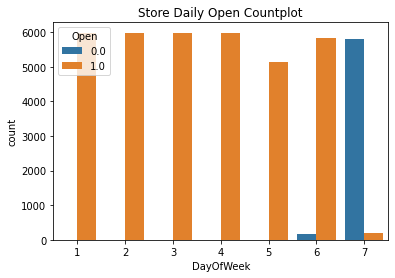

In [20]:
# check stores open distribution on days of week
import seaborn as sns
sns.countplot(x = 'DayOfWeek', hue = 'Open', data = test)
plt.title('Store Daily Open Countplot')


In [22]:
np.shape(test[test.Open.isnull()])

(11, 8)

In [23]:
# fill missing values in test with 1
test.fillna(value = 1, inplace = True)

In [24]:
# merge data with store 
train = pd.merge(train, store, on='Store')
test = pd.merge(test, store, on='Store')

# split the last 6 weeks data as hold-out set (idea from Gert https://www.kaggle.com/c/rossmann-store-sales/discussion/18024)
train = train.sort_values(['Date'],ascending = False)
train_total = train.copy()

split_index = 6*7*1115
valid = train[:split_index] 
train = train[split_index:]

# only use data of Sales>0 and Open is 1
valid = valid[(valid.Open != 0)&(valid.Sales >0)]
train = train[(train.Open != 0)&(train.Sales >0)]
train_total = train_total[(train_total.Open != 0)&(train_total.Sales >0)]

/home/j3nnn1/anaconda3/envs/roosmanProject/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/j3nnn1/anaconda3/envs/roosmanProject/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


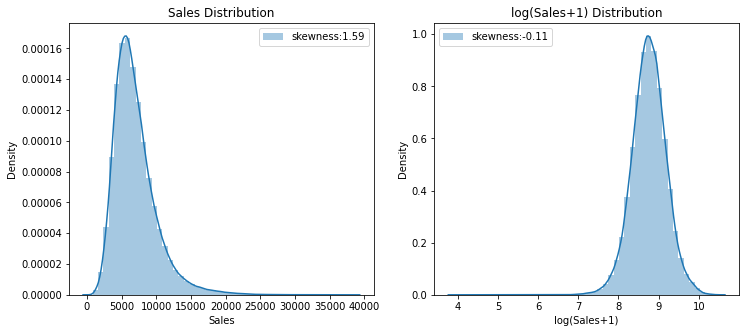

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
# change
# utureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
# warnings.warn(msg, FutureWarning)
# check distribution of sales in train set
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
g1 = sns.distplot(train['Sales'],hist = True,label='skewness:{:.2f}'.format(train['Sales'].skew()),ax = ax1)
g1.legend()
g1.set(xlabel = 'Sales', ylabel = 'Density', title = 'Sales Distribution')
g2 = sns.distplot(np.log1p(train['Sales']),hist = True,label='skewness:{:.2f}'.format(np.log1p(train['Sales']).skew()),ax=ax2)
g2.legend()
g2.set(xlabel = 'log(Sales+1)',ylabel = 'Density', title = 'log(Sales+1) Distribution')
plt.show()

In [34]:
train.StateHoliday.value_counts()

0    803146
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [35]:
# process train and test
def process(data, isTest = False):
    # label encode some features
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    
    # extract some features from date column  
    data['Month'] = data.Date.dt.month
    data['Year'] = data.Date.dt.year
    data['Day'] = data.Date.dt.day
    data['WeekOfYear'] = data.Date.dt.weekofyear
    
    # calculate competiter open time in months
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) + \
        (data.Month - data.CompetitionOpenSinceMonth)
    data['CompetitionOpen'] = data['CompetitionOpen'].apply(lambda x: x if x > 0 else 0)
    
    # calculate promo2 open time in months
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) + \
        (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['PromoOpen'] = data['PromoOpen'].apply(lambda x: x if x > 0 else 0)
                                                 
    # Indicate whether the month is in promo interval
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', \
             7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['month_str'] = data.Month.map(month2str)

    def check(row):
        if isinstance(row['PromoInterval'],str) and row['month_str'] in row['PromoInterval']:
            return 1
        else:
            return 0
        
    data['IsPromoMonth'] =  data.apply(lambda row: check(row),axis=1)    
    
    # select the features we need
    features = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'PromoOpen', 'IsPromoMonth']  
    if not isTest:
        features.append('Sales')
        
    data = data[features]
    return data

In [36]:
# FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.
# Please use Series.dt.isocalendar().week instead.
# data['WeekOfYear'] = data.Date.dt.weekofyear

train = process(train)
valid = process(valid)
train_total = process(train_total)
x_test = process(test,isTest = True)  

/tmp/ipykernel_105236/3416529256.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['WeekOfYear'] = data.Date.dt.weekofyear


In [38]:
# sort by index
valid.sort_index(inplace = True)
train.sort_index(inplace = True)
train_total.sort_index(inplace = True)

# split x and y
x_train, y_train = train.drop(columns = ['Sales']), np.log1p(train['Sales'])
x_valid, y_valid = valid.drop(columns = ['Sales']), np.log1p(valid['Sales'])
x_train_total, y_train_total = train_total.drop(columns = ['Sales']), np.log1p(train_total['Sales'])

In [39]:
# define eval metrics
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [41]:
# try random forest
# 0.157
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators = 15)
clf.fit(x_train, y_train)
# validation
y_pred = clf.predict(x_valid)
error = rmspe(np.expm1(y_valid), np.expm1(y_pred))
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.1609


Text(0.5, 1.0, 'Feature Importance')

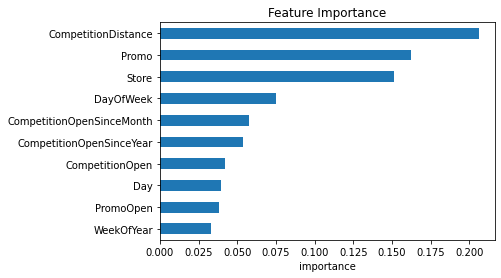

In [42]:
# plot feature importance for random forest model, show top 10 features
feat_importances = pd.Series(clf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).sort_values(ascending = True).plot(kind='barh')
plt.xlabel('importance')
plt.title('Feature Importance')

In [44]:
import xgboost as xgb

params = {"objective": "reg:linear", # for linear regression
          "booster" : "gbtree",   # use tree based models 
          "eta": 0.03,   # learning rate
          "max_depth": 10,    # maximum depth of a tree
          "subsample": 0.9,    # Subsample ratio of the training instances
          "colsample_bytree": 0.7,   # Subsample ratio of columns when constructing each tree
          "silent": 1,   # silent mode
          "seed": 10   # Random number seed
          }
num_boost_round = 4000

dtrain = xgb.DMatrix(x_train, y_train)
dvalid = xgb.DMatrix(x_valid, y_valid)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
# train the xgboost model
model = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds= 100, feval=rmspe_xg, verbose_eval=True)

[19:31:04] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:04] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-rmse:8.02086	train-rmspe:0.99981	eval-rmse:8.02678	eval-rmspe:0.99981
[1]	train-rmse:7.78077	train-rmspe:0.99971	eval-rmse:7.78617	eval-rmspe:0.99971
[2]	train-rmse:7.54781	train-rmspe:0.99959	eval-rmse:7.55351	eval-rmspe:0.99959
[3]	train-rmse:7.32187	train-rmspe:0.99944	eval-rmse:7.32798	eval-rmspe:0.99945
[4]	train-rmse:7.10267	train-rmspe:0.99927	eval-rmse:7.10925	eval-rmspe:0.99928
[5]	train-rmse:6.89008	train-rmspe:0.99906	eval-rmse:6.89674	eval-rmspe:0.99907
[6]	train-rmse:6.68388	train-rmspe:0.99880	e

[96]	train-rmse:0.50030	train-rmspe:0.38536	eval-rmse:0.49197	eval-rmspe:0.36834
[97]	train-rmse:0.48886	train-rmspe:0.37922	eval-rmse:0.48028	eval-rmspe:0.36152
[98]	train-rmse:0.47797	train-rmspe:0.37329	eval-rmse:0.46963	eval-rmspe:0.35526
[99]	train-rmse:0.46741	train-rmspe:0.36757	eval-rmse:0.45924	eval-rmspe:0.34910
[100]	train-rmse:0.45724	train-rmspe:0.36195	eval-rmse:0.44932	eval-rmspe:0.34326
[101]	train-rmse:0.44754	train-rmspe:0.35670	eval-rmse:0.43979	eval-rmspe:0.33760
[102]	train-rmse:0.43764	train-rmspe:0.35134	eval-rmse:0.43005	eval-rmspe:0.33183
[103]	train-rmse:0.42805	train-rmspe:0.34611	eval-rmse:0.42055	eval-rmspe:0.32618
[104]	train-rmse:0.41938	train-rmspe:0.34147	eval-rmse:0.41197	eval-rmspe:0.32109
[105]	train-rmse:0.41090	train-rmspe:0.33689	eval-rmse:0.40370	eval-rmspe:0.31618
[106]	train-rmse:0.40252	train-rmspe:0.33243	eval-rmse:0.39524	eval-rmspe:0.31113
[107]	train-rmse:0.39484	train-rmspe:0.32838	eval-rmse:0.38756	eval-rmspe:0.30663
[108]	train-rmse:0.3

[196]	train-rmse:0.19266	train-rmspe:0.24026	eval-rmse:0.20402	eval-rmspe:0.21740
[197]	train-rmse:0.19155	train-rmspe:0.23945	eval-rmse:0.20305	eval-rmspe:0.21655
[198]	train-rmse:0.19129	train-rmspe:0.23943	eval-rmse:0.20288	eval-rmspe:0.21665
[199]	train-rmse:0.19078	train-rmspe:0.23918	eval-rmse:0.20252	eval-rmspe:0.21649
[200]	train-rmse:0.19046	train-rmspe:0.23908	eval-rmse:0.20234	eval-rmspe:0.21642
[201]	train-rmse:0.19009	train-rmspe:0.23878	eval-rmse:0.20203	eval-rmspe:0.21625
[202]	train-rmse:0.18957	train-rmspe:0.23842	eval-rmse:0.20161	eval-rmspe:0.21588
[203]	train-rmse:0.18859	train-rmspe:0.23786	eval-rmse:0.20075	eval-rmspe:0.21510
[204]	train-rmse:0.18850	train-rmspe:0.23800	eval-rmse:0.20072	eval-rmspe:0.21523
[205]	train-rmse:0.18768	train-rmspe:0.23766	eval-rmse:0.20000	eval-rmspe:0.21458
[206]	train-rmse:0.18696	train-rmspe:0.23707	eval-rmse:0.19940	eval-rmspe:0.21404
[207]	train-rmse:0.18680	train-rmspe:0.23708	eval-rmse:0.19928	eval-rmspe:0.21395
[208]	train-rmse

[296]	train-rmse:0.15393	train-rmspe:0.19981	eval-rmse:0.17144	eval-rmspe:0.18696
[297]	train-rmse:0.15338	train-rmspe:0.19911	eval-rmse:0.17100	eval-rmspe:0.18649
[298]	train-rmse:0.15321	train-rmspe:0.19897	eval-rmse:0.17083	eval-rmspe:0.18632
[299]	train-rmse:0.15295	train-rmspe:0.19870	eval-rmse:0.17060	eval-rmspe:0.18609
[300]	train-rmse:0.15262	train-rmspe:0.19846	eval-rmse:0.17029	eval-rmspe:0.18573
[301]	train-rmse:0.15246	train-rmspe:0.19831	eval-rmse:0.17013	eval-rmspe:0.18556
[302]	train-rmse:0.15218	train-rmspe:0.19803	eval-rmse:0.16992	eval-rmspe:0.18534
[303]	train-rmse:0.15189	train-rmspe:0.19782	eval-rmse:0.16972	eval-rmspe:0.18515
[304]	train-rmse:0.15174	train-rmspe:0.19759	eval-rmse:0.16957	eval-rmspe:0.18497
[305]	train-rmse:0.15119	train-rmspe:0.19705	eval-rmse:0.16911	eval-rmspe:0.18440
[306]	train-rmse:0.15059	train-rmspe:0.19651	eval-rmse:0.16862	eval-rmspe:0.18387
[307]	train-rmse:0.15032	train-rmspe:0.19479	eval-rmse:0.16841	eval-rmspe:0.18366
[308]	train-rmse

[396]	train-rmse:0.13071	train-rmspe:0.17033	eval-rmse:0.15242	eval-rmspe:0.16620
[397]	train-rmse:0.13042	train-rmspe:0.17010	eval-rmse:0.15218	eval-rmspe:0.16594
[398]	train-rmse:0.13020	train-rmspe:0.16989	eval-rmse:0.15202	eval-rmspe:0.16577
[399]	train-rmse:0.13012	train-rmspe:0.16984	eval-rmse:0.15196	eval-rmspe:0.16571
[400]	train-rmse:0.12990	train-rmspe:0.16964	eval-rmse:0.15179	eval-rmspe:0.16552
[401]	train-rmse:0.12970	train-rmspe:0.16946	eval-rmse:0.15165	eval-rmspe:0.16537
[402]	train-rmse:0.12961	train-rmspe:0.16936	eval-rmse:0.15158	eval-rmspe:0.16528
[403]	train-rmse:0.12951	train-rmspe:0.16927	eval-rmse:0.15127	eval-rmspe:0.16494
[404]	train-rmse:0.12944	train-rmspe:0.16913	eval-rmse:0.15123	eval-rmspe:0.16491
[405]	train-rmse:0.12938	train-rmspe:0.16915	eval-rmse:0.15117	eval-rmspe:0.16487
[406]	train-rmse:0.12934	train-rmspe:0.16913	eval-rmse:0.15114	eval-rmspe:0.16483
[407]	train-rmse:0.12914	train-rmspe:0.16764	eval-rmse:0.15097	eval-rmspe:0.16464
[408]	train-rmse

[496]	train-rmse:0.11817	train-rmspe:0.14911	eval-rmse:0.14314	eval-rmspe:0.15592
[497]	train-rmse:0.11810	train-rmspe:0.14904	eval-rmse:0.14312	eval-rmspe:0.15590
[498]	train-rmse:0.11806	train-rmspe:0.14815	eval-rmse:0.14309	eval-rmspe:0.15587
[499]	train-rmse:0.11795	train-rmspe:0.14809	eval-rmse:0.14301	eval-rmspe:0.15577
[500]	train-rmse:0.11789	train-rmspe:0.14800	eval-rmse:0.14296	eval-rmspe:0.15572
[501]	train-rmse:0.11782	train-rmspe:0.14794	eval-rmse:0.14291	eval-rmspe:0.15568
[502]	train-rmse:0.11772	train-rmspe:0.14781	eval-rmse:0.14287	eval-rmspe:0.15563
[503]	train-rmse:0.11755	train-rmspe:0.14763	eval-rmse:0.14273	eval-rmspe:0.15544
[504]	train-rmse:0.11744	train-rmspe:0.14748	eval-rmse:0.14269	eval-rmspe:0.15540
[505]	train-rmse:0.11721	train-rmspe:0.14726	eval-rmse:0.14253	eval-rmspe:0.15522
[506]	train-rmse:0.11713	train-rmspe:0.14719	eval-rmse:0.14248	eval-rmspe:0.15517
[507]	train-rmse:0.11699	train-rmspe:0.14705	eval-rmse:0.14236	eval-rmspe:0.15503
[508]	train-rmse

[596]	train-rmse:0.10922	train-rmspe:0.13711	eval-rmse:0.13683	eval-rmspe:0.14884
[597]	train-rmse:0.10919	train-rmspe:0.13711	eval-rmse:0.13669	eval-rmspe:0.14868
[598]	train-rmse:0.10909	train-rmspe:0.13702	eval-rmse:0.13663	eval-rmspe:0.14860
[599]	train-rmse:0.10902	train-rmspe:0.13696	eval-rmse:0.13659	eval-rmspe:0.14857
[600]	train-rmse:0.10896	train-rmspe:0.13690	eval-rmse:0.13653	eval-rmspe:0.14851
[601]	train-rmse:0.10892	train-rmspe:0.13686	eval-rmse:0.13647	eval-rmspe:0.14842
[602]	train-rmse:0.10887	train-rmspe:0.13682	eval-rmse:0.13644	eval-rmspe:0.14838
[603]	train-rmse:0.10884	train-rmspe:0.13677	eval-rmse:0.13640	eval-rmspe:0.14835
[604]	train-rmse:0.10879	train-rmspe:0.13673	eval-rmse:0.13637	eval-rmspe:0.14831
[605]	train-rmse:0.10873	train-rmspe:0.13659	eval-rmse:0.13638	eval-rmspe:0.14834
[606]	train-rmse:0.10865	train-rmspe:0.13650	eval-rmse:0.13631	eval-rmspe:0.14825
[607]	train-rmse:0.10860	train-rmspe:0.13642	eval-rmse:0.13630	eval-rmspe:0.14827
[608]	train-rmse

[696]	train-rmse:0.10340	train-rmspe:0.12704	eval-rmse:0.13276	eval-rmspe:0.14443
[697]	train-rmse:0.10337	train-rmspe:0.12700	eval-rmse:0.13274	eval-rmspe:0.14441
[698]	train-rmse:0.10332	train-rmspe:0.12696	eval-rmse:0.13271	eval-rmspe:0.14437
[699]	train-rmse:0.10327	train-rmspe:0.12650	eval-rmse:0.13274	eval-rmspe:0.14442
[700]	train-rmse:0.10324	train-rmspe:0.12647	eval-rmse:0.13271	eval-rmspe:0.14439
[701]	train-rmse:0.10315	train-rmspe:0.12639	eval-rmse:0.13265	eval-rmspe:0.14433
[702]	train-rmse:0.10311	train-rmspe:0.12599	eval-rmse:0.13265	eval-rmspe:0.14433
[703]	train-rmse:0.10305	train-rmspe:0.12594	eval-rmse:0.13260	eval-rmspe:0.14427
[704]	train-rmse:0.10297	train-rmspe:0.12585	eval-rmse:0.13255	eval-rmspe:0.14421
[705]	train-rmse:0.10295	train-rmspe:0.12582	eval-rmse:0.13248	eval-rmspe:0.14413
[706]	train-rmse:0.10293	train-rmspe:0.12580	eval-rmse:0.13247	eval-rmspe:0.14412
[707]	train-rmse:0.10287	train-rmspe:0.12566	eval-rmse:0.13247	eval-rmspe:0.14412
[708]	train-rmse

[796]	train-rmse:0.09861	train-rmspe:0.11933	eval-rmse:0.12984	eval-rmspe:0.14117
[797]	train-rmse:0.09854	train-rmspe:0.11927	eval-rmse:0.12979	eval-rmspe:0.14112
[798]	train-rmse:0.09845	train-rmspe:0.11923	eval-rmse:0.12973	eval-rmspe:0.14105
[799]	train-rmse:0.09841	train-rmspe:0.11919	eval-rmse:0.12970	eval-rmspe:0.14102
[800]	train-rmse:0.09836	train-rmspe:0.11915	eval-rmse:0.12968	eval-rmspe:0.14100
[801]	train-rmse:0.09833	train-rmspe:0.11910	eval-rmse:0.12966	eval-rmspe:0.14098
[802]	train-rmse:0.09824	train-rmspe:0.11902	eval-rmse:0.12960	eval-rmspe:0.14092
[803]	train-rmse:0.09822	train-rmspe:0.11900	eval-rmse:0.12958	eval-rmspe:0.14089
[804]	train-rmse:0.09816	train-rmspe:0.11895	eval-rmse:0.12956	eval-rmspe:0.14087
[805]	train-rmse:0.09815	train-rmspe:0.11894	eval-rmse:0.12956	eval-rmspe:0.14087
[806]	train-rmse:0.09814	train-rmspe:0.11892	eval-rmse:0.12954	eval-rmspe:0.14086
[807]	train-rmse:0.09813	train-rmspe:0.11891	eval-rmse:0.12954	eval-rmspe:0.14085
[808]	train-rmse

[896]	train-rmse:0.09472	train-rmspe:0.11392	eval-rmse:0.12759	eval-rmspe:0.13871
[897]	train-rmse:0.09469	train-rmspe:0.11387	eval-rmse:0.12757	eval-rmspe:0.13869
[898]	train-rmse:0.09466	train-rmspe:0.11385	eval-rmse:0.12756	eval-rmspe:0.13868
[899]	train-rmse:0.09462	train-rmspe:0.11381	eval-rmse:0.12754	eval-rmspe:0.13866
[900]	train-rmse:0.09459	train-rmspe:0.11358	eval-rmse:0.12752	eval-rmspe:0.13863
[901]	train-rmse:0.09455	train-rmspe:0.11354	eval-rmse:0.12750	eval-rmspe:0.13861
[902]	train-rmse:0.09452	train-rmspe:0.11351	eval-rmse:0.12748	eval-rmspe:0.13859
[903]	train-rmse:0.09449	train-rmspe:0.11349	eval-rmse:0.12747	eval-rmspe:0.13857
[904]	train-rmse:0.09447	train-rmspe:0.11346	eval-rmse:0.12745	eval-rmspe:0.13856
[905]	train-rmse:0.09445	train-rmspe:0.11344	eval-rmse:0.12744	eval-rmspe:0.13853
[906]	train-rmse:0.09443	train-rmspe:0.11342	eval-rmse:0.12742	eval-rmspe:0.13852
[907]	train-rmse:0.09439	train-rmspe:0.11338	eval-rmse:0.12740	eval-rmspe:0.13848
[908]	train-rmse

[996]	train-rmse:0.09155	train-rmspe:0.10811	eval-rmse:0.12596	eval-rmspe:0.13696
[997]	train-rmse:0.09154	train-rmspe:0.10809	eval-rmse:0.12596	eval-rmspe:0.13696
[998]	train-rmse:0.09151	train-rmspe:0.10807	eval-rmse:0.12594	eval-rmspe:0.13694
[999]	train-rmse:0.09148	train-rmspe:0.10801	eval-rmse:0.12594	eval-rmspe:0.13696
[1000]	train-rmse:0.09146	train-rmspe:0.10798	eval-rmse:0.12595	eval-rmspe:0.13696
[1001]	train-rmse:0.09141	train-rmspe:0.10794	eval-rmse:0.12593	eval-rmspe:0.13694
[1002]	train-rmse:0.09139	train-rmspe:0.10792	eval-rmse:0.12592	eval-rmspe:0.13693
[1003]	train-rmse:0.09137	train-rmspe:0.10790	eval-rmse:0.12591	eval-rmspe:0.13692
[1004]	train-rmse:0.09134	train-rmspe:0.10787	eval-rmse:0.12589	eval-rmspe:0.13690
[1005]	train-rmse:0.09133	train-rmspe:0.10785	eval-rmse:0.12589	eval-rmspe:0.13690
[1006]	train-rmse:0.09129	train-rmspe:0.10781	eval-rmse:0.12587	eval-rmspe:0.13688
[1007]	train-rmse:0.09128	train-rmspe:0.10780	eval-rmse:0.12586	eval-rmspe:0.13686
[1008]	t

[1095]	train-rmse:0.08894	train-rmspe:0.10390	eval-rmse:0.12506	eval-rmspe:0.13604
[1096]	train-rmse:0.08887	train-rmspe:0.10384	eval-rmse:0.12502	eval-rmspe:0.13599
[1097]	train-rmse:0.08883	train-rmspe:0.10378	eval-rmse:0.12498	eval-rmspe:0.13591
[1098]	train-rmse:0.08879	train-rmspe:0.10374	eval-rmse:0.12496	eval-rmspe:0.13589
[1099]	train-rmse:0.08877	train-rmspe:0.10371	eval-rmse:0.12496	eval-rmspe:0.13588
[1100]	train-rmse:0.08875	train-rmspe:0.10369	eval-rmse:0.12495	eval-rmspe:0.13588
[1101]	train-rmse:0.08873	train-rmspe:0.10364	eval-rmse:0.12495	eval-rmspe:0.13588
[1102]	train-rmse:0.08869	train-rmspe:0.10361	eval-rmse:0.12493	eval-rmspe:0.13585
[1103]	train-rmse:0.08867	train-rmspe:0.10357	eval-rmse:0.12497	eval-rmspe:0.13590
[1104]	train-rmse:0.08865	train-rmspe:0.10355	eval-rmse:0.12497	eval-rmspe:0.13590
[1105]	train-rmse:0.08863	train-rmspe:0.10352	eval-rmse:0.12498	eval-rmspe:0.13592
[1106]	train-rmse:0.08862	train-rmspe:0.10350	eval-rmse:0.12496	eval-rmspe:0.13590
[110

[1194]	train-rmse:0.08665	train-rmspe:0.10083	eval-rmse:0.12412	eval-rmspe:0.13493
[1195]	train-rmse:0.08663	train-rmspe:0.10081	eval-rmse:0.12412	eval-rmspe:0.13493
[1196]	train-rmse:0.08662	train-rmspe:0.10080	eval-rmse:0.12413	eval-rmspe:0.13495
[1197]	train-rmse:0.08660	train-rmspe:0.10078	eval-rmse:0.12415	eval-rmspe:0.13498
[1198]	train-rmse:0.08659	train-rmspe:0.10077	eval-rmse:0.12414	eval-rmspe:0.13496
[1199]	train-rmse:0.08658	train-rmspe:0.10076	eval-rmse:0.12414	eval-rmspe:0.13497
[1200]	train-rmse:0.08656	train-rmspe:0.10074	eval-rmse:0.12413	eval-rmspe:0.13496
[1201]	train-rmse:0.08652	train-rmspe:0.10065	eval-rmse:0.12413	eval-rmspe:0.13495
[1202]	train-rmse:0.08651	train-rmspe:0.10063	eval-rmse:0.12412	eval-rmspe:0.13494
[1203]	train-rmse:0.08650	train-rmspe:0.10062	eval-rmse:0.12412	eval-rmspe:0.13495
[1204]	train-rmse:0.08648	train-rmspe:0.10052	eval-rmse:0.12412	eval-rmspe:0.13495
[1205]	train-rmse:0.08647	train-rmspe:0.10050	eval-rmse:0.12412	eval-rmspe:0.13494
[120

[1293]	train-rmse:0.08481	train-rmspe:0.09834	eval-rmse:0.12358	eval-rmspe:0.13433
[1294]	train-rmse:0.08480	train-rmspe:0.09833	eval-rmse:0.12358	eval-rmspe:0.13433
[1295]	train-rmse:0.08479	train-rmspe:0.09832	eval-rmse:0.12358	eval-rmspe:0.13433
[1296]	train-rmse:0.08477	train-rmspe:0.09829	eval-rmse:0.12358	eval-rmspe:0.13433
[1297]	train-rmse:0.08473	train-rmspe:0.09826	eval-rmse:0.12356	eval-rmspe:0.13431
[1298]	train-rmse:0.08470	train-rmspe:0.09823	eval-rmse:0.12355	eval-rmspe:0.13430
[1299]	train-rmse:0.08468	train-rmspe:0.09820	eval-rmse:0.12354	eval-rmspe:0.13430
[1300]	train-rmse:0.08467	train-rmspe:0.09818	eval-rmse:0.12354	eval-rmspe:0.13430
[1301]	train-rmse:0.08464	train-rmspe:0.09815	eval-rmse:0.12353	eval-rmspe:0.13429
[1302]	train-rmse:0.08463	train-rmspe:0.09813	eval-rmse:0.12353	eval-rmspe:0.13428
[1303]	train-rmse:0.08462	train-rmspe:0.09812	eval-rmse:0.12353	eval-rmspe:0.13428
[1304]	train-rmse:0.08460	train-rmspe:0.09810	eval-rmse:0.12351	eval-rmspe:0.13427
[130

[1392]	train-rmse:0.08317	train-rmspe:0.09580	eval-rmse:0.12299	eval-rmspe:0.13372
[1393]	train-rmse:0.08315	train-rmspe:0.09578	eval-rmse:0.12299	eval-rmspe:0.13372
[1394]	train-rmse:0.08314	train-rmspe:0.09576	eval-rmse:0.12298	eval-rmspe:0.13372
[1395]	train-rmse:0.08313	train-rmspe:0.09574	eval-rmse:0.12299	eval-rmspe:0.13372
[1396]	train-rmse:0.08312	train-rmspe:0.09573	eval-rmse:0.12298	eval-rmspe:0.13372
[1397]	train-rmse:0.08310	train-rmspe:0.09570	eval-rmse:0.12298	eval-rmspe:0.13372
[1398]	train-rmse:0.08309	train-rmspe:0.09569	eval-rmse:0.12298	eval-rmspe:0.13372
[1399]	train-rmse:0.08308	train-rmspe:0.09568	eval-rmse:0.12298	eval-rmspe:0.13372
[1400]	train-rmse:0.08306	train-rmspe:0.09566	eval-rmse:0.12297	eval-rmspe:0.13371
[1401]	train-rmse:0.08304	train-rmspe:0.09564	eval-rmse:0.12296	eval-rmspe:0.13370
[1402]	train-rmse:0.08302	train-rmspe:0.09560	eval-rmse:0.12295	eval-rmspe:0.13369
[1403]	train-rmse:0.08300	train-rmspe:0.09557	eval-rmse:0.12294	eval-rmspe:0.13367
[140

[1491]	train-rmse:0.08161	train-rmspe:0.09308	eval-rmse:0.12256	eval-rmspe:0.13323
[1492]	train-rmse:0.08160	train-rmspe:0.09307	eval-rmse:0.12256	eval-rmspe:0.13323
[1493]	train-rmse:0.08159	train-rmspe:0.09305	eval-rmse:0.12255	eval-rmspe:0.13323
[1494]	train-rmse:0.08157	train-rmspe:0.09304	eval-rmse:0.12255	eval-rmspe:0.13322
[1495]	train-rmse:0.08156	train-rmspe:0.09301	eval-rmse:0.12255	eval-rmspe:0.13322
[1496]	train-rmse:0.08154	train-rmspe:0.09298	eval-rmse:0.12254	eval-rmspe:0.13322
[1497]	train-rmse:0.08150	train-rmspe:0.09295	eval-rmse:0.12253	eval-rmspe:0.13320
[1498]	train-rmse:0.08149	train-rmspe:0.09294	eval-rmse:0.12253	eval-rmspe:0.13320
[1499]	train-rmse:0.08148	train-rmspe:0.09293	eval-rmse:0.12253	eval-rmspe:0.13320
[1500]	train-rmse:0.08147	train-rmspe:0.09292	eval-rmse:0.12253	eval-rmspe:0.13320
[1501]	train-rmse:0.08145	train-rmspe:0.09290	eval-rmse:0.12253	eval-rmspe:0.13320
[1502]	train-rmse:0.08144	train-rmspe:0.09289	eval-rmse:0.12252	eval-rmspe:0.13319
[150

[1590]	train-rmse:0.08012	train-rmspe:0.09054	eval-rmse:0.12222	eval-rmspe:0.13286
[1591]	train-rmse:0.08010	train-rmspe:0.09051	eval-rmse:0.12222	eval-rmspe:0.13286
[1592]	train-rmse:0.08009	train-rmspe:0.09050	eval-rmse:0.12221	eval-rmspe:0.13285
[1593]	train-rmse:0.08008	train-rmspe:0.09048	eval-rmse:0.12221	eval-rmspe:0.13284
[1594]	train-rmse:0.08006	train-rmspe:0.09047	eval-rmse:0.12220	eval-rmspe:0.13283
[1595]	train-rmse:0.08005	train-rmspe:0.09045	eval-rmse:0.12219	eval-rmspe:0.13283
[1596]	train-rmse:0.08004	train-rmspe:0.09044	eval-rmse:0.12219	eval-rmspe:0.13283
[1597]	train-rmse:0.08003	train-rmspe:0.09043	eval-rmse:0.12219	eval-rmspe:0.13282
[1598]	train-rmse:0.08001	train-rmspe:0.09041	eval-rmse:0.12219	eval-rmspe:0.13282
[1599]	train-rmse:0.08000	train-rmspe:0.09040	eval-rmse:0.12218	eval-rmspe:0.13282
[1600]	train-rmse:0.07999	train-rmspe:0.09037	eval-rmse:0.12218	eval-rmspe:0.13281
[1601]	train-rmse:0.07997	train-rmspe:0.09035	eval-rmse:0.12217	eval-rmspe:0.13280
[160

[1689]	train-rmse:0.07888	train-rmspe:0.08859	eval-rmse:0.12196	eval-rmspe:0.13260
[1690]	train-rmse:0.07887	train-rmspe:0.08857	eval-rmse:0.12196	eval-rmspe:0.13260
[1691]	train-rmse:0.07885	train-rmspe:0.08854	eval-rmse:0.12196	eval-rmspe:0.13259
[1692]	train-rmse:0.07882	train-rmspe:0.08851	eval-rmse:0.12195	eval-rmspe:0.13258
[1693]	train-rmse:0.07881	train-rmspe:0.08850	eval-rmse:0.12195	eval-rmspe:0.13258
[1694]	train-rmse:0.07880	train-rmspe:0.08849	eval-rmse:0.12194	eval-rmspe:0.13257
[1695]	train-rmse:0.07879	train-rmspe:0.08848	eval-rmse:0.12194	eval-rmspe:0.13257
[1696]	train-rmse:0.07878	train-rmspe:0.08846	eval-rmse:0.12191	eval-rmspe:0.13252
[1697]	train-rmse:0.07876	train-rmspe:0.08844	eval-rmse:0.12190	eval-rmspe:0.13251
[1698]	train-rmse:0.07875	train-rmspe:0.08843	eval-rmse:0.12190	eval-rmspe:0.13251
[1699]	train-rmse:0.07874	train-rmspe:0.08841	eval-rmse:0.12190	eval-rmspe:0.13251
[1700]	train-rmse:0.07872	train-rmspe:0.08839	eval-rmse:0.12189	eval-rmspe:0.13250
[170

[1788]	train-rmse:0.07761	train-rmspe:0.08675	eval-rmse:0.12158	eval-rmspe:0.13212
[1789]	train-rmse:0.07759	train-rmspe:0.08673	eval-rmse:0.12158	eval-rmspe:0.13211
[1790]	train-rmse:0.07758	train-rmspe:0.08672	eval-rmse:0.12157	eval-rmspe:0.13210
[1791]	train-rmse:0.07757	train-rmspe:0.08671	eval-rmse:0.12158	eval-rmspe:0.13210
[1792]	train-rmse:0.07756	train-rmspe:0.08670	eval-rmse:0.12157	eval-rmspe:0.13210
[1793]	train-rmse:0.07755	train-rmspe:0.08669	eval-rmse:0.12158	eval-rmspe:0.13211
[1794]	train-rmse:0.07754	train-rmspe:0.08668	eval-rmse:0.12158	eval-rmspe:0.13211
[1795]	train-rmse:0.07752	train-rmspe:0.08666	eval-rmse:0.12157	eval-rmspe:0.13210
[1796]	train-rmse:0.07752	train-rmspe:0.08665	eval-rmse:0.12157	eval-rmspe:0.13210
[1797]	train-rmse:0.07750	train-rmspe:0.08649	eval-rmse:0.12157	eval-rmspe:0.13210
[1798]	train-rmse:0.07749	train-rmspe:0.08647	eval-rmse:0.12157	eval-rmspe:0.13210
[1799]	train-rmse:0.07748	train-rmspe:0.08646	eval-rmse:0.12158	eval-rmspe:0.13210
[180

[1887]	train-rmse:0.07644	train-rmspe:0.08481	eval-rmse:0.12137	eval-rmspe:0.13190
[1888]	train-rmse:0.07643	train-rmspe:0.08480	eval-rmse:0.12137	eval-rmspe:0.13190
[1889]	train-rmse:0.07642	train-rmspe:0.08479	eval-rmse:0.12137	eval-rmspe:0.13190
[1890]	train-rmse:0.07642	train-rmspe:0.08478	eval-rmse:0.12137	eval-rmspe:0.13190
[1891]	train-rmse:0.07640	train-rmspe:0.08476	eval-rmse:0.12137	eval-rmspe:0.13189
[1892]	train-rmse:0.07639	train-rmspe:0.08475	eval-rmse:0.12137	eval-rmspe:0.13190
[1893]	train-rmse:0.07637	train-rmspe:0.08473	eval-rmse:0.12136	eval-rmspe:0.13189
[1894]	train-rmse:0.07637	train-rmspe:0.08472	eval-rmse:0.12138	eval-rmspe:0.13192
[1895]	train-rmse:0.07635	train-rmspe:0.08469	eval-rmse:0.12138	eval-rmspe:0.13192
[1896]	train-rmse:0.07635	train-rmspe:0.08469	eval-rmse:0.12138	eval-rmspe:0.13192
[1897]	train-rmse:0.07633	train-rmspe:0.08467	eval-rmse:0.12138	eval-rmspe:0.13192
[1898]	train-rmse:0.07632	train-rmspe:0.08466	eval-rmse:0.12138	eval-rmspe:0.13192
[189

[1986]	train-rmse:0.07544	train-rmspe:0.08333	eval-rmse:0.12120	eval-rmspe:0.13174
[1987]	train-rmse:0.07543	train-rmspe:0.08332	eval-rmse:0.12120	eval-rmspe:0.13174
[1988]	train-rmse:0.07542	train-rmspe:0.08330	eval-rmse:0.12120	eval-rmspe:0.13174
[1989]	train-rmse:0.07541	train-rmspe:0.08328	eval-rmse:0.12119	eval-rmspe:0.13174
[1990]	train-rmse:0.07540	train-rmspe:0.08326	eval-rmse:0.12120	eval-rmspe:0.13174
[1991]	train-rmse:0.07538	train-rmspe:0.08325	eval-rmse:0.12120	eval-rmspe:0.13174
[1992]	train-rmse:0.07537	train-rmspe:0.08323	eval-rmse:0.12119	eval-rmspe:0.13174
[1993]	train-rmse:0.07536	train-rmspe:0.08322	eval-rmse:0.12119	eval-rmspe:0.13173
[1994]	train-rmse:0.07535	train-rmspe:0.08321	eval-rmse:0.12119	eval-rmspe:0.13173
[1995]	train-rmse:0.07534	train-rmspe:0.08320	eval-rmse:0.12119	eval-rmspe:0.13173
[1996]	train-rmse:0.07533	train-rmspe:0.08319	eval-rmse:0.12119	eval-rmspe:0.13173
[1997]	train-rmse:0.07532	train-rmspe:0.08316	eval-rmse:0.12119	eval-rmspe:0.13174
[199

[2085]	train-rmse:0.07438	train-rmspe:0.08182	eval-rmse:0.12107	eval-rmspe:0.13164
[2086]	train-rmse:0.07437	train-rmspe:0.08181	eval-rmse:0.12107	eval-rmspe:0.13164
[2087]	train-rmse:0.07436	train-rmspe:0.08179	eval-rmse:0.12107	eval-rmspe:0.13164
[2088]	train-rmse:0.07436	train-rmspe:0.08174	eval-rmse:0.12107	eval-rmspe:0.13164
[2089]	train-rmse:0.07435	train-rmspe:0.08174	eval-rmse:0.12107	eval-rmspe:0.13164
[2090]	train-rmse:0.07434	train-rmspe:0.08164	eval-rmse:0.12107	eval-rmspe:0.13164
[2091]	train-rmse:0.07433	train-rmspe:0.08161	eval-rmse:0.12107	eval-rmspe:0.13164
[2092]	train-rmse:0.07432	train-rmspe:0.08159	eval-rmse:0.12107	eval-rmspe:0.13164
[2093]	train-rmse:0.07431	train-rmspe:0.08159	eval-rmse:0.12106	eval-rmspe:0.13163
[2094]	train-rmse:0.07430	train-rmspe:0.08158	eval-rmse:0.12106	eval-rmspe:0.13163
[2095]	train-rmse:0.07429	train-rmspe:0.08156	eval-rmse:0.12105	eval-rmspe:0.13162
[2096]	train-rmse:0.07428	train-rmspe:0.08156	eval-rmse:0.12105	eval-rmspe:0.13162
[209

In [45]:
# validation
y_pred = model.predict(xgb.DMatrix(x_valid))
error = rmspe(np.expm1(y_valid), np.expm1(y_pred))
print('RMSPE: {:.4f}'.format(error))

RMSPE: 0.1316


Best weight is 0.995, RMSPE is 0.1240


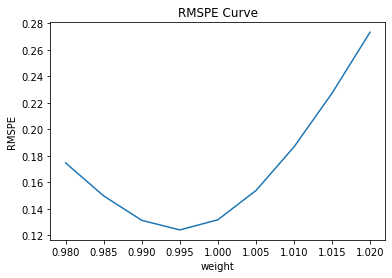

In [46]:
# rmspe correction on the whole
def correction():
    weights = np.arange(0.98, 1.02, 0.005)
    errors = []
    for w in weights:
        error = rmspe(np.expm1(y_valid), np.expm1(y_pred*w))
        errors.append(error)
        
    # make line plot
    plt.plot(weights, errors)
    plt.xlabel('weight')
    plt.ylabel('RMSPE')
    plt.title('RMSPE Curve')
    # print min error
    idx = errors.index(min(errors))
    print('Best weight is {}, RMSPE is {:.4f}'.format(weights[idx], min(errors)))
    
correction()

In [47]:
x_train_total.head().append(x_train_total.tail())

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth
0,1,5,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,31,31,82.0,24187.75,0
1,1,4,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,30,31,82.0,24187.75,0
2,1,3,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,29,31,82.0,24187.75,0
3,1,2,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,28,31,82.0,24187.75,0
4,1,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,27,31,82.0,24187.75,0
1017202,1115,1,1,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,7,2,24157.0,7.00,0
1017204,1115,6,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,5,1,24157.0,6.75,0
1017205,1115,5,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,4,1,24157.0,6.75,0
1017206,1115,4,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,3,1,24157.0,6.75,0
1017207,1115,3,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,2012.0,2013,1,2,1,24157.0,6.75,0


In [48]:
print(x_train_total.shape)
print(y_train_total.shape)

(844338, 20)
(844338,)


In [49]:
dtrain = xgb.DMatrix(x_train_total, y_train_total)
dtest = xgb.DMatrix(x_test)
# specify parameters via map
params = {"objective": "reg:linear", # for linear regression
          "booster" : "gbtree",   # use tree based models 
          "eta": 0.03,   # learning rate
          "max_depth": 10,    # maximum depth of a tree
          "subsample": 0.9,    # Subsample ratio of the training instances
          "colsample_bytree": 0.7,   # Subsample ratio of columns when constructing each tree
          "silent": 1,   # silent mode
          "seed": 10   # Random number seed
          }
num_round = 3000
model = xgb.train(params, dtrain, num_round)
# make prediction
preds = model.predict(dtest)

[20:14:36] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:36] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




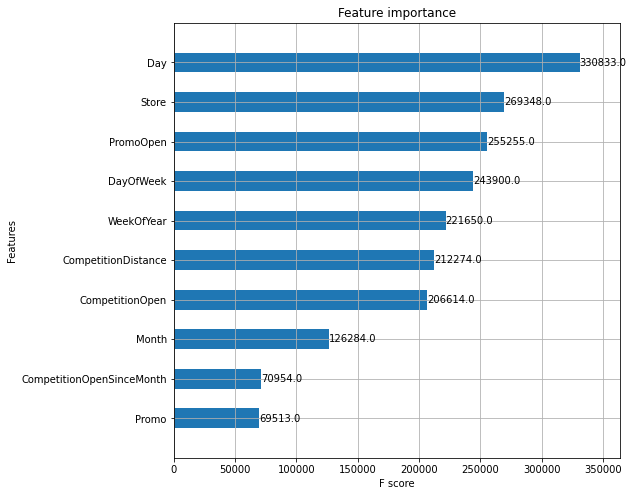

In [51]:
# make submission using best weight
result = pd.DataFrame({"Id": test["Id"],'Sales': np.expm1(preds*0.995)})
result.to_csv("submission_xgb.csv", index=False)

# plot feature importance, show top 10 features
fig, ax = plt.subplots(figsize=(8,8))
xgb.plot_importance(model, max_num_features= 10, height=0.5, ax=ax)
plt.show()